In [2]:
import pandas as pd
import os


In [3]:
dir_path = r"C:\Users\shano\OneDrive\Desktop\Sales_Data"
df =pd.DataFrame()
files = [file for file in os.listdir(dir_path)]
for file in files:
    file_path = os.path.join(dir_path,file)
    month=pd.read_csv(file_path)
    df = pd.concat([df,month])
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df["Order Date"].dropna(inplace=True)
df.dropna(inplace=True)

In [5]:
df["month"]=df["Order Date"].str[0:2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [6]:
# df.duplicated().sum()
df.drop_duplicates()
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04


In [7]:
adf=df[df["Quantity Ordered"]!="Quantity Ordered"]
adf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [8]:
adf["Quantity Ordered"]=adf["Quantity Ordered"].astype("int")
adf["Price Each"]=adf["Price Each"].astype("float")

C:\Users\shano\AppData\Local\Temp\ipykernel_24732\2841887649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["Quantity Ordered"]=adf["Quantity Ordered"].astype("int")
C:\Users\shano\AppData\Local\Temp\ipykernel_24732\2841887649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["Price Each"]=adf["Price Each"].astype("float")


In [9]:
adf["sales"]=adf["Quantity Ordered"]*adf['Price Each']
adf.head()

C:\Users\shano\AppData\Local\Temp\ipykernel_24732\1659575455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["sales"]=adf["Quantity Ordered"]*adf['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


**question1** :what was the best month for sales?how much income?

In [10]:
g1 =adf.groupby("month")["sales"].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
g1


month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
Name: sales, dtype: float64

<Axes: xlabel='month', ylabel='sales'>

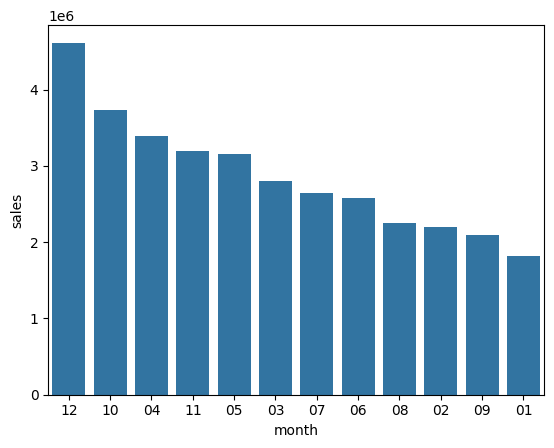

In [11]:
g1=pd.DataFrame(g1)
sns.barplot(x="month",y="sales",data=g1)

question2 :what city has highest sales

In [12]:
def get_city(address):
    return address.split(',')[1]
# adf["city"]=adf["Purchase Address"].apply(lambda x: get_city(x))

def get_state(address):
    return address.split(',')[2].split(" ")[1]
adf["state"]=adf["Purchase Address"].apply(lambda x: get_city(x)+"("+get_state(x)+")")
adf


C:\Users\shano\AppData\Local\Temp\ipykernel_24732\3257584302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["state"]=adf["Purchase Address"].apply(lambda x: get_city(x)+"("+get_state(x)+")")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles(CA)
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco(CA)
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco(CA)
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco(CA)


C:\Users\shano\AppData\Local\Temp\ipykernel_24732\2724140939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="state",y="sales", data=g2,palette="husl")


<Axes: xlabel='state', ylabel='sales'>

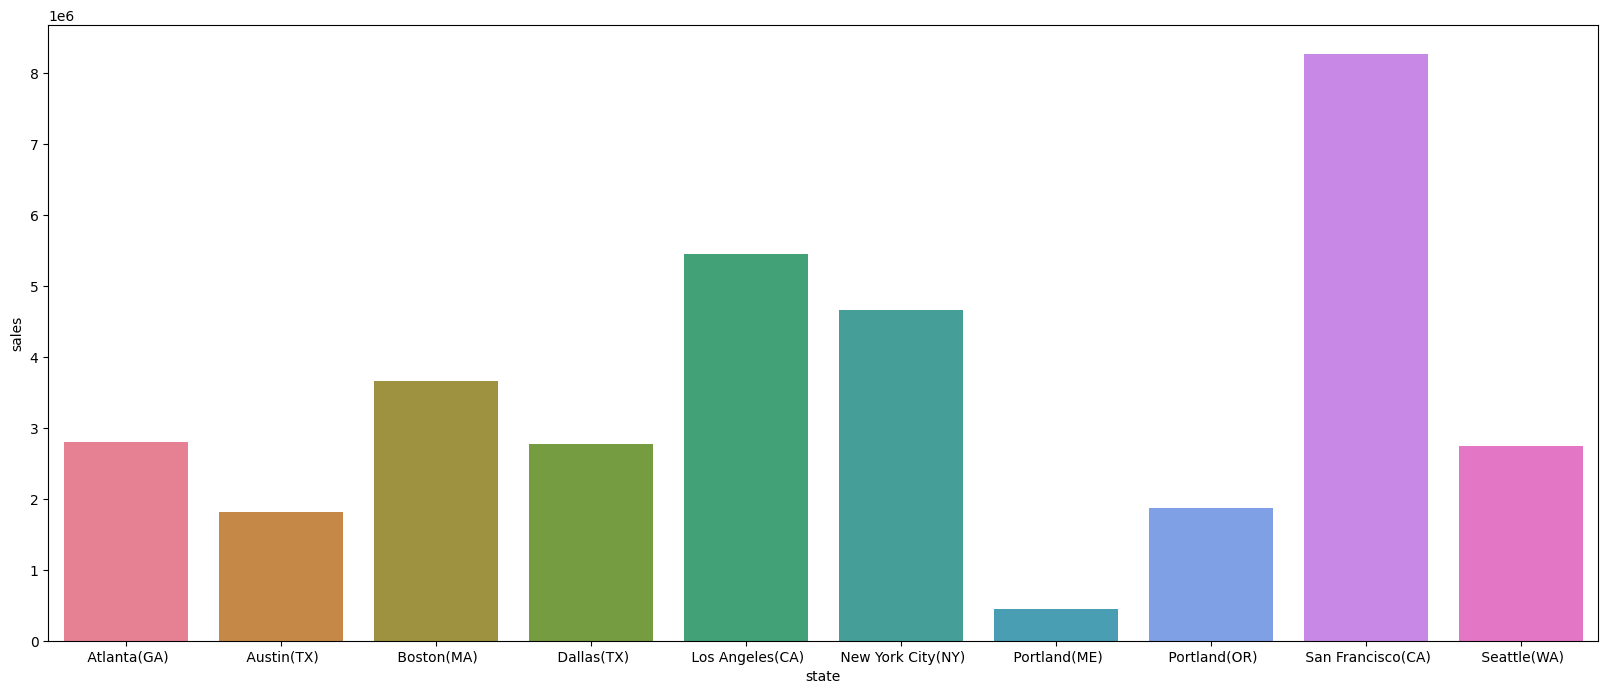

In [13]:
g2 = adf.groupby("state")["sales"].sum()
g2 = pd.DataFrame(g2)
plt.figure(figsize=(20,8))
sns.barplot(x="state",y="sales", data=g2,palette="husl")

question 3 what time should we display adds

In [14]:
adf["Order Date"]=pd.to_datetime(adf["Order Date"])

C:\Users\shano\AppData\Local\Temp\ipykernel_24732\4186433083.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adf["Order Date"]=pd.to_datetime(adf["Order Date"])
C:\Users\shano\AppData\Local\Temp\ipykernel_24732\4186433083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["Order Date"]=pd.to_datetime(adf["Order Date"])


In [15]:
adf["hour"]=adf["Order Date"].dt.hour
adf["Minute"]=adf["Order Date"].dt.minute

C:\Users\shano\AppData\Local\Temp\ipykernel_24732\1967773693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["hour"]=adf["Order Date"].dt.hour
C:\Users\shano\AppData\Local\Temp\ipykernel_24732\1967773693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf["Minute"]=adf["Order Date"].dt.minute


In [16]:
bdf =adf[adf["Order ID"].duplicated(keep=False)]
bdf["grouped"]=bdf.groupby("Order ID")["Product"].transform(lambda x:','.join(x))
bdf = bdf[["grouped","Order ID"]].drop_duplicates()
bdf["grouped"].value_counts().head(10)

C:\Users\shano\AppData\Local\Temp\ipykernel_24732\114239523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf["grouped"]=bdf.groupby("Order ID")["Product"].transform(lambda x:','.join(x))


grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64

Question5:What product sold the most?Reason?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '20in Monitor'),
  Text(1, 0, '27in 4K Gaming Monitor'),
  Text(2, 0, '27in FHD Monitor'),
  Text(3, 0, '34in Ultrawide Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'AAA Batteries (4-pack)'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Bose SoundSport Headphones'),
  Text(8, 0, 'Flatscreen TV'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'LG Dryer'),
  Text(11, 0, 'LG Washing Machine'),
  Text(12, 0, 'Lightning Charging Cable'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'USB-C Charging Cable'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'Wired Headphones'),
  Text(18, 0, 'iPhone')])

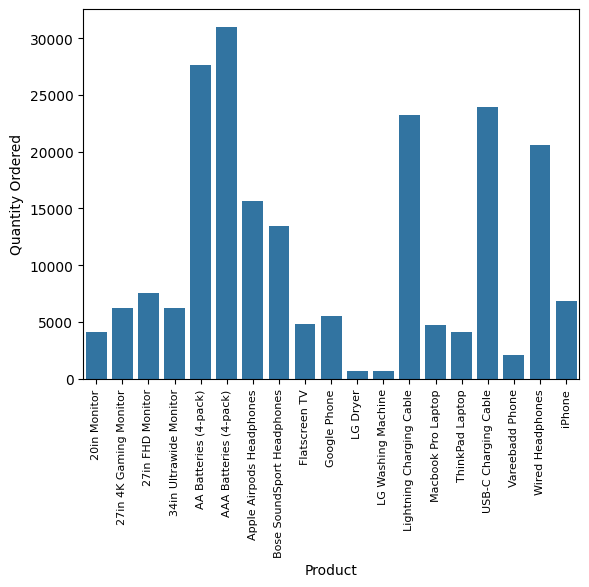

In [17]:
cdf  =adf.groupby("Product")["Quantity Ordered"].sum()
cdf=pd.DataFrame(cdf)
sns.barplot(x="Product",y="Quantity Ordered",data=cdf)
plt.xticks(rotation=90,size=8)

In [18]:
import datetime

In [19]:
x=datetime.datetime.today()
print(x)

2023-12-01 12:48:30.104908


In [20]:
from datetime import datetime

date_string = "2023-12-01"
date_object = datetime.strptime(date_string, "%Y-%m-%d").strftime("%d %b %y")
print(date_object)


01 Dec 23


ValueError: time data 'Or' does not match format '%m'

In [ ]:
def get_month(no):
    return datetime.strptime(str(no),"%m").strftime("%B")
df["new_month"]=df["month"].apply(lambda x:get_month(x))
df

NameError: name 'df' is not defined